# Data preparation and customer analytics 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

## Import The Customer Purchase Data

In [2]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.reset_index(inplace=True)
purchase = purchase.rename(columns={'level_0':'LYLTY_CARD_NBR','level_1':'LIFESTAGE','QVI_purchase_behaviour':'PREMIUM_CUSTOMER'} )
purchase = purchase.drop(index = 0)
purchase.reset_index(drop=True)
purchase = purchase.astype({'LYLTY_CARD_NBR': 'int64'},copy=True)
print(purchase.head(10))

    LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
1             1000   YOUNG SINGLES/COUPLES          Premium
2             1002   YOUNG SINGLES/COUPLES       Mainstream
3             1003          YOUNG FAMILIES           Budget
4             1004   OLDER SINGLES/COUPLES       Mainstream
5             1005  MIDAGE SINGLES/COUPLES       Mainstream
6             1007   YOUNG SINGLES/COUPLES           Budget
7             1009            NEW FAMILIES          Premium
8             1010   YOUNG SINGLES/COUPLES       Mainstream
9             1011   OLDER SINGLES/COUPLES       Mainstream
10            1012          OLDER FAMILIES       Mainstream


### Data exploration
Examining the customer data

                LIFESTAGE  LYLTY_CARD_NBR  PREMIUM_CUSTOMER
4                RETIREES           14805             14805
3   OLDER SINGLES/COUPLES           14609             14609
6   YOUNG SINGLES/COUPLES           14441             14441
2          OLDER FAMILIES            9780              9780
5          YOUNG FAMILIES            9178              9178
0  MIDAGE SINGLES/COUPLES            7275              7275
1            NEW FAMILIES            2549              2549


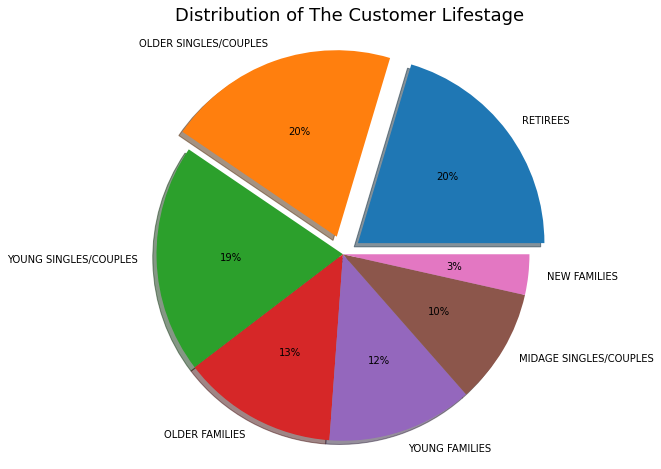

In [3]:
lifestage = purchase.groupby(['LIFESTAGE']).count().reset_index()
lifestage = lifestage.sort_values(by = ['LYLTY_CARD_NBR'], ascending=False)
print(lifestage)
lifestagecustomer = lifestage['LIFESTAGE'].values
lifestagecount = lifestage['LYLTY_CARD_NBR'].values
explode = (0.1,0.1,0,0,0,0,0)
plt.figure(figsize = (10,8))
plt.pie(lifestagecount,labels = lifestagecustomer,autopct = '%d%%', explode=explode,shadow=True)
plt.axis('equal')
plt.title('Distribution of The Customer Lifestage',fontsize = 18)
plt.show()


  PREMIUM_CUSTOMER  LYLTY_CARD_NBR  LIFESTAGE
1       Mainstream           29245      29245
0           Budget           24470      24470
2          Premium           18922      18922


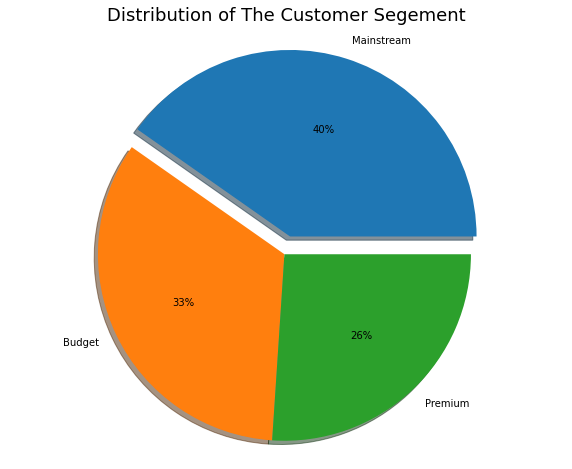

In [4]:

premium = purchase.groupby(['PREMIUM_CUSTOMER']).count().reset_index()
premium = premium.sort_values(by = ['LYLTY_CARD_NBR'], ascending=False)
print(premium)
Premiumcustomer = premium['PREMIUM_CUSTOMER'].values
premiumcount = premium['LYLTY_CARD_NBR'].values
explode = (0.1,0,0)
plt.figure(figsize = (10,8))
plt.pie(premiumcount,labels = Premiumcustomer,autopct = '%d%%', explode=explode,shadow=True)
plt.axis('equal')
plt.title('Distribution of The Customer Segement',fontsize = 18)
plt.show()


## Import The Transaction Data
change exceldate int into date

In [5]:
transaction = pd.read_csv('QVI_transaction_data.csv')
transaction['DATE'] = pd.TimedeltaIndex(transaction['DATE'], unit='d') + dt.datetime(1899, 12, 30)
transaction = transaction.sort_values(by=['DATE'])
product_list = transaction.groupby(['PROD_NAME']).count().reset_index()
print(product_list)


                                  PROD_NAME  DATE  STORE_NBR  LYLTY_CARD_NBR  \
0                         Burger Rings 220g  1564       1564            1564   
1                  CCs Nacho Cheese    175g  1498       1498            1498   
2                         CCs Original 175g  1514       1514            1514   
3                  CCs Tasty Cheese    175g  1539       1539            1539   
4            Cheetos Chs & Bacon Balls 190g  1479       1479            1479   
..                                      ...   ...        ...             ...   
109  WW Sour Cream &OnionStacked Chips 160g  1483       1483            1483   
110     WW Supreme Cheese   Corn Chips 200g  1509       1509            1509   
111          Woolworths Cheese   Rings 190g  1516       1516            1516   
112          Woolworths Medium   Salsa 300g  1430       1430            1430   
113          Woolworths Mild     Salsa 300g  1491       1491            1491   

     TXN_ID  PROD_NBR  PROD_QTY  TOT_SA

## Examining the transaction data

check whether non-chips products are in the list 

In [6]:

transaction = transaction[~transaction['PROD_NAME'].str.contains('Salsa')]
print(transaction.head(10))

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
100938 2018-07-01         19           19205   16466        26   
65566  2018-07-01        189          189381  190189        84   
43733  2018-07-01        124          124236  127984       104   
175455 2018-07-01         70           70131   68241        60   
205813 2018-07-01         33           33140   30342        10   
17681  2018-07-01         18           18221   15451        80   
212483 2018-07-01        172          172242  174273        48   
120377 2018-07-01         39           39200   35859        96   
152659 2018-07-01         23           23124   19481       102   
27818  2018-07-01        238          238384  243454        32   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
100938              Pringles Sweet&Spcy BBQ 134g         1        3.7  
65566      GrnWves Plus Btroot & Chilli Jam 180g         1        3.1  
43733   Infuzions Thai SweetChili PotatoMix 110g         

remove salsa<br>
Lets see is there any outliers.

In [7]:
transaction.describe()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


the maximum of product quantity could be an outlier.

In [8]:
transaction.loc[transaction['PROD_QTY'] == 200]
transaction.loc[transaction['LYLTY_CARD_NBR'] == 226000]



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are only two transaction for this customer so this is not an ordinary transaction habit so we drop the row 

In [9]:
transaction = transaction[transaction['LYLTY_CARD_NBR'] != 226000]
transaction.describe()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


                 DATE  TXN_ID
2018-07-01 2018-07-01     663
2018-07-02 2018-07-02     650
2018-07-03 2018-07-03     674
2018-07-04 2018-07-04     669
2018-07-05 2018-07-05     660
...               ...     ...
2019-06-26 2019-06-26     657
2019-06-27 2019-06-27     669
2019-06-28 2019-06-28     673
2019-06-29 2019-06-29     703
2019-06-30 2019-06-30     704

[364 rows x 2 columns]


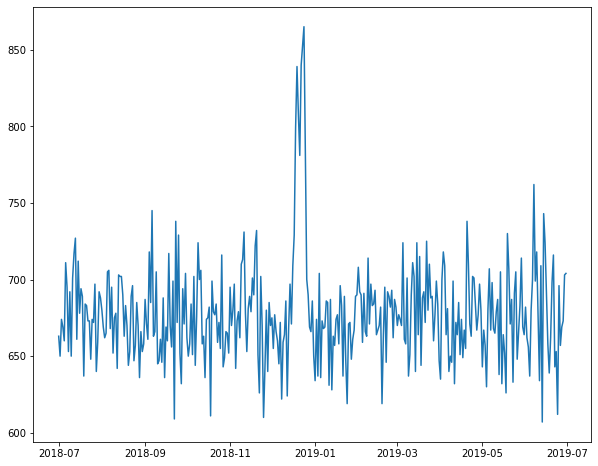

In [10]:

Daily_transaction = transaction.groupby(['DATE'])['TXN_ID'].count().reset_index()
Daily_transaction = Daily_transaction.set_index(pd.DatetimeIndex(Daily_transaction['DATE'].values))
print(Daily_transaction)
x = Daily_transaction.index
y = Daily_transaction['TXN_ID']
plt.figure(figsize = (10,8))
plt.plot(x,y)
plt.show()


We can see that there is a dramatically increase in December and this is because of Christmas.
Create a new column of size 

In [11]:
transaction['Size'] = transaction['PROD_NAME'].str.extract('(\d+)')
transaction = transaction.astype({'Size': 'int64'},copy=True)
print(transaction)
transaction['Size'].describe()

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
100938 2018-07-01         19           19205   16466        26   
65566  2018-07-01        189          189381  190189        84   
43733  2018-07-01        124          124236  127984       104   
175455 2018-07-01         70           70131   68241        60   
205813 2018-07-01         33           33140   30342        10   
...           ...        ...             ...     ...       ...   
40823  2019-06-30         97           97085   96824        33   
249581 2019-06-30        148          148317  148317       112   
78296  2019-06-30        212          212068  210874       113   
121166 2019-06-30         55           55029   48630         2   
170071 2019-06-30        247          247060  248955        12   

                                       PROD_NAME  PROD_QTY  TOT_SALES  Size  
100938              Pringles Sweet&Spcy BBQ 134g         1        3.7   134  
65566      GrnWves Plus Btroot & Chilli Jam 180g   

count    246740.000000
mean        175.583521
std          59.432118
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: Size, dtype: float64

 Lets see the frequency of different package size 

In [12]:
size = transaction.groupby(['Size'])['PROD_NAME'].count().reset_index()
size = size.rename(columns = {'PROD_NAME':'Frequency'})
print(size)


    Size  Frequency
0     70       1507
1     90       3008
2    110      22387
3    125       1454
4    134      25102
5    135       3257
6    150      40203
7    160       2970
8    165      15297
9    170      19983
10   175      66390
11   180       1468
12   190       2995
13   200       4473
14   210       6272
15   220       1564
16   250       3169
17   270       6285
18   330      12540
19   380       6416


Text(0, 0.5, 'Frequency')

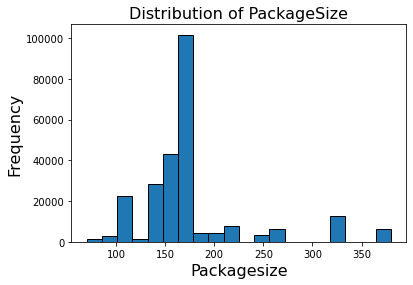

In [13]:
plt.hist(transaction['Size'],bins = 20, edgecolor='black')
plt.title("Distribution of PackageSize", fontsize = 16)
plt.xlabel("Packagesize", fontsize = 16)
plt.ylabel("Frequency", fontsize = 16)


The largest size is 380g and the smallest size is 70g
Lets rename the brand name 


In [14]:
transaction["Brand"]= transaction["PROD_NAME"].str.split(" ",1).str[0]
print(transaction)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
100938 2018-07-01         19           19205   16466        26   
65566  2018-07-01        189          189381  190189        84   
43733  2018-07-01        124          124236  127984       104   
175455 2018-07-01         70           70131   68241        60   
205813 2018-07-01         33           33140   30342        10   
...           ...        ...             ...     ...       ...   
40823  2019-06-30         97           97085   96824        33   
249581 2019-06-30        148          148317  148317       112   
78296  2019-06-30        212          212068  210874       113   
121166 2019-06-30         55           55029   48630         2   
170071 2019-06-30        247          247060  248955        12   

                                       PROD_NAME  PROD_QTY  TOT_SALES  Size  \
100938              Pringles Sweet&Spcy BBQ 134g         1        3.7   134   
65566      GrnWves Plus Btroot & Chilli Jam 180g 

In [15]:
brand  = transaction.groupby(["Brand"]).count().reset_index()
brand = brand.sort_values(by=['Brand'])
print(brand)

         Brand   DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  \
0       Burger   1564       1564            1564    1564      1564       1564   
1          CCs   4551       4551            4551    4551      4551       4551   
2      Cheetos   2927       2927            2927    2927      2927       2927   
3     Cheezels   4603       4603            4603    4603      4603       4603   
4         Cobs   9693       9693            9693    9693      9693       9693   
5       Dorito   3183       3183            3183    3183      3183       3183   
6      Doritos  22041      22041           22041   22041     22041      22041   
7       French   1418       1418            1418    1418      1418       1418   
8        Grain   6272       6272            6272    6272      6272       6272   
9      GrnWves   1468       1468            1468    1468      1468       1468   
10   Infuzions  11057      11057           11057   11057     11057      11057   
11      Infzns   3144       

 Seems like there are some brands are written by different name <br>
lets rename them 

In [16]:
transaction.loc[transaction["Brand"] == 'Doritos'] = 'Dorito'
transaction.loc[transaction["Brand"] == 'GrnWves'] = 'Grain'
transaction.loc[transaction["Brand"] == 'Infzns'] = 'Infuzions'
transaction.loc[transaction["Brand"] == 'NCC'] = 'Natural'
transaction.loc[transaction["Brand"] == 'RRD'] = 'Red'
transaction.loc[transaction["Brand"] == 'Smiths'] = 'Smith'
transaction.loc[transaction["Brand"] == 'Snbts'] = 'Woolworths'
transaction.loc[transaction["Brand"] == 'WW'] = 'WW'
brand  = transaction.groupby(["Brand"]).count().reset_index()
brand = brand.sort_values(by=['Brand'])
print(brand)


         Brand   DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  PROD_NAME  \
0       Burger   1564       1564            1564    1564      1564       1564   
1          CCs   4551       4551            4551    4551      4551       4551   
2      Cheetos   2927       2927            2927    2927      2927       2927   
3     Cheezels   4603       4603            4603    4603      4603       4603   
4         Cobs   9693       9693            9693    9693      9693       9693   
5       Dorito  25224      25224           25224   25224     25224      25224   
6       French   1418       1418            1418    1418      1418       1418   
7        Grain   7740       7740            7740    7740      7740       7740   
8    Infuzions  14201      14201           14201   14201     14201      14201   
9       Kettle  41288      41288           41288   41288     41288      41288   
10     Natural   7469       7469            7469    7469      7469       7469   
11    Pringles  25102      2

## Merge two Data

In [17]:

new_data = pd.merge(transaction,purchase,how = 'left')
new_data = new_data.dropna()
print(new_data.head())

                  DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
0  2018-07-01 00:00:00        19          19205   16466       26   
2  2018-07-01 00:00:00       124         124236  127984      104   
3  2018-07-01 00:00:00        70          70131   68241       60   
5  2018-07-01 00:00:00        18          18221   15451       80   
6  2018-07-01 00:00:00       172         172242  174273       48   

                                  PROD_NAME PROD_QTY TOT_SALES Size  \
0              Pringles Sweet&Spcy BBQ 134g        1       3.7  134   
2  Infuzions Thai SweetChili PotatoMix 110g        1       3.8  110   
3      Kettle Tortilla ChpsFeta&Garlic 150g        2       9.2  150   
5    Natural ChipCo Sea  Salt & Vinegr 175g        1         3  175   
6   Red Rock Deli Sp    Salt & Truffle 150G        2       5.4  150   

       Brand               LIFESTAGE PREMIUM_CUSTOMER  
0   Pringles   OLDER SINGLES/COUPLES       Mainstream  
2  Infuzions          OLDER FAMILIES           Budge

In [18]:
new_data['TOT_SALES'] = pd.to_numeric(new_data['TOT_SALES'])
print(new_data.head())


                  DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
0  2018-07-01 00:00:00        19          19205   16466       26   
2  2018-07-01 00:00:00       124         124236  127984      104   
3  2018-07-01 00:00:00        70          70131   68241       60   
5  2018-07-01 00:00:00        18          18221   15451       80   
6  2018-07-01 00:00:00       172         172242  174273       48   

                                  PROD_NAME PROD_QTY  TOT_SALES Size  \
0              Pringles Sweet&Spcy BBQ 134g        1        3.7  134   
2  Infuzions Thai SweetChili PotatoMix 110g        1        3.8  110   
3      Kettle Tortilla ChpsFeta&Garlic 150g        2        9.2  150   
5    Natural ChipCo Sea  Salt & Vinegr 175g        1        3.0  175   
6   Red Rock Deli Sp    Salt & Truffle 150G        2        5.4  150   

       Brand               LIFESTAGE PREMIUM_CUSTOMER  
0   Pringles   OLDER SINGLES/COUPLES       Mainstream  
2  Infuzions          OLDER FAMILIES          


## Data analysis on customer segments

After the cleaning the data,,we can define some metrics of interest to the client:
1.Which customer segement spends the most on chips(describing by lifestage and how premium their purchasing bahaviour is)
2.How many customers are in each segment
3.How mant chip are bought per customer by segment
4.Whats the average chip price by customer segment 
## Futher discussion
1.What is the spending proportion on chip over the whole grocery spending

PREMIUM_CUSTOMER           Budget  Mainstream   Premium
LIFESTAGE                                              
MIDAGE SINGLES/COUPLES   22866.40    60963.85  38405.05
NEW FAMILIES             14937.55    11409.70   7701.70
OLDER FAMILIES          106942.35    65903.95  51359.50
OLDER SINGLES/COUPLES    91737.70    87652.70  88142.45
RETIREES                 75543.10   103076.65  65949.35
YOUNG FAMILIES           88665.25    59094.45  54829.00
YOUNG SINGLES/COUPLES    39208.80   108131.90  27135.20


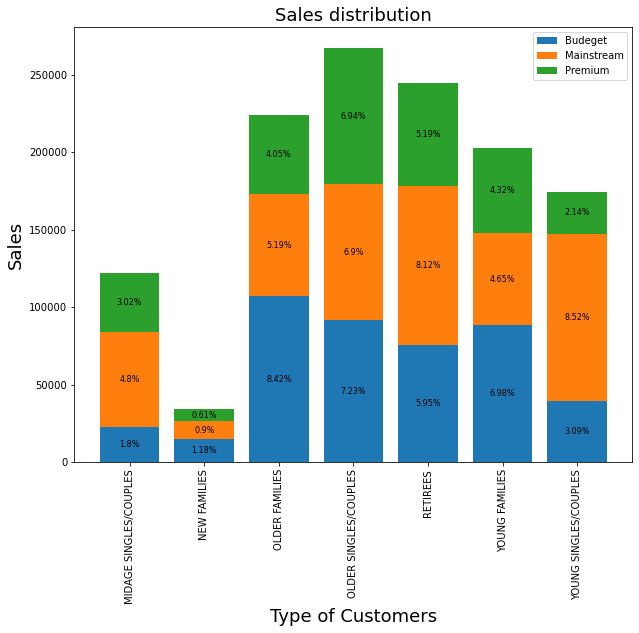

In [19]:
life_premium = new_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
print(life_premium)
Lifestage = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
Budget = life_premium['Budget']
Mainstream = life_premium['Mainstream']
Premium = life_premium['Premium']
Total_sales = new_data['TOT_SALES'].sum()
x = range(7)
pre_bottom = np.add(Budget,Mainstream)
plt.figure(figsize = (10,8))
plt.bar(x,Budget)
plt.bar(x,Mainstream,bottom = Budget)
plt.bar(x,Premium,bottom = pre_bottom)
ax = plt.subplot()
plt.xticks(rotation=90)
ax.set_xticks(range(len(Lifestage)))
ax.set_xticklabels(Lifestage)
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{round(((height/Total_sales)*100),2)}%'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
plt.legend(['Budeget','Mainstream','Premium'])
plt.title('Sales distribution',fontsize = 18)
plt.xlabel('Type of Customers',fontsize = 18)
plt.ylabel('Sales',fontsize = 18)
plt.show()



Therefore,our sales are coming mainly from Budget-older families,Mainstream -retirees and Mainstream - Young Singles/couples.<br>
Lets see is this due to the number of customer in these segement 

In [20]:
life_premium_count = new_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()
print(life_premium_count)

PREMIUM_CUSTOMER        Budget  Mainstream  Premium
LIFESTAGE                                          
MIDAGE SINGLES/COUPLES    1252        3041     2060
NEW FAMILIES               941         706      504
OLDER FAMILIES            4210        2562     2051
OLDER SINGLES/COUPLES     4424        4342     4271
RETIREES                  3924        5605     3441
YOUNG FAMILIES            3605        2444     2178
YOUNG SINGLES/COUPLES     2883        6984     1978


63406


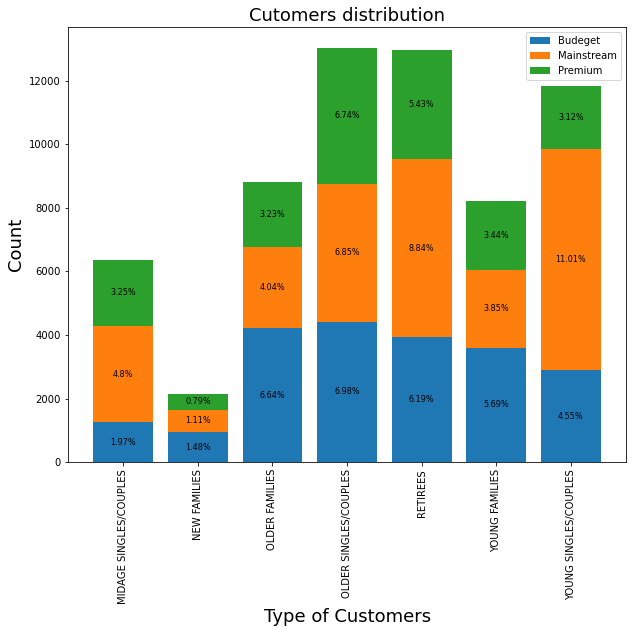

In [21]:

Life = ['MIDAGE SINGLES/COUPLES','NEW FAMILIES','OLDER FAMILIES','OLDER SINGLES/COUPLES','RETIREES','YOUNG FAMILIES','YOUNG SINGLES/COUPLES']
Budget_count = life_premium_count['Budget']
Mainstream_count = life_premium_count['Mainstream']
Premium_count = life_premium_count['Premium']
Total_count = new_data['LYLTY_CARD_NBR'].nunique()
print(Total_count)
x = range(7)
pre_bottom_count = np.add(Budget_count,Mainstream_count)
plt.figure(figsize = (10,8))
plt.bar(x,Budget_count)
plt.bar(x,Mainstream_count,bottom = Budget_count)
plt.bar(x,Premium_count,bottom = pre_bottom_count)
ax1 = plt.subplot()
plt.xticks(rotation=90)
ax1.set_xticks(range(len(Lifestage)))
ax1.set_xticklabels(Life)
for rect in ax1.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    # The height of the bar is the data value and can be used as the label
    label_text = f'{round(((height/Total_count)*100),2)}%'  # f'{height:.2f}' to format decimal values
    
    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax1.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
plt.legend(['Budeget','Mainstream','Premium'])
plt.title('Cutomers distribution',fontsize = 18)
plt.xlabel('Type of Customers',fontsize = 18)
plt.ylabel('Count',fontsize = 18)
plt.show()



From the above chart,we can see that there are more Mainstream - Young Singles/couples and Mainstream-retiress buy chips therefore this contribute to the reason why there are more sales to these customer but this is not the major driver for for the Budget- Older families segment.<br>

Higer sales might also due to the more units of chips being bought per customer


PREMIUM_CUSTOMER          Budget  Mainstream   Premium
LIFESTAGE                                             
MIDAGE SINGLES/COUPLES  4.668530    4.910227  4.745631
NEW FAMILIES            3.945802    3.980170  3.853175
OLDER FAMILIES          6.498337    6.610851  6.431497
OLDER SINGLES/COUPLES   5.177441    5.100184  5.135565
RETIREES                4.769878    4.631044  4.751526
YOUNG FAMILIES          6.278502    6.229951  6.419192
YOUNG SINGLES/COUPLES   3.531391    3.756586  3.559656


Text(0, 0.5, 'Unit')

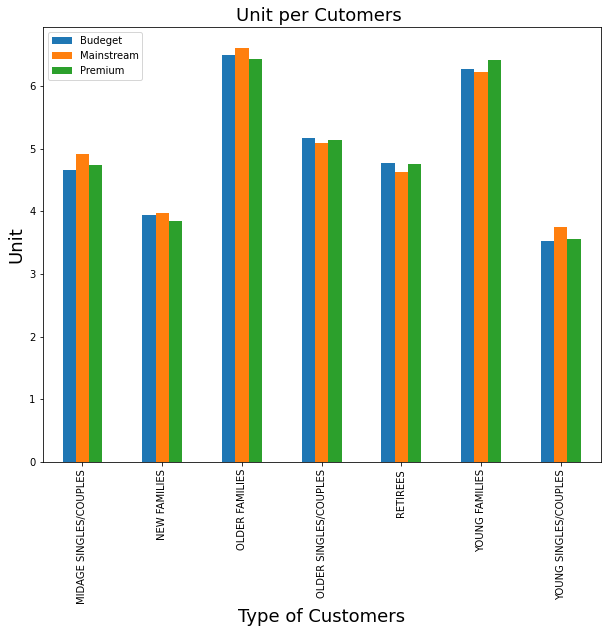

In [22]:
chips_per_customers = new_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().unstack()
chips_per_customers = chips_per_customers/life_premium_count
print(chips_per_customers)
ax2 = chips_per_customers.plot.bar(figsize = (10,8))
ax2.legend(['Budeget','Mainstream','Premium'])
ax2.set_title('Unit per Cutomers ',fontsize = 18)
ax2.set_xlabel('Type of Customers',fontsize = 18)
ax2.set_ylabel('Unit',fontsize = 18)

Therefore older family and young family are generally buying more chips

**Investigating Sales per Customers**


In [23]:
sales_per_customers = new_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()
sales_per_customers = sales_per_customers/life_premium_count/chips_per_customers
print(sales_per_customers)


PREMIUM_CUSTOMER          Budget  Mainstream   Premium
LIFESTAGE                                             
MIDAGE SINGLES/COUPLES  3.912130    4.082765  3.928503
NEW FAMILIES            4.023041    4.060391  3.965860
OLDER FAMILIES          3.908997    3.891123  3.893526
OLDER SINGLES/COUPLES   4.005139    3.958126  4.018531
RETIREES                4.036069    3.971054  4.033599
YOUNG FAMILIES          3.917348    3.881154  3.921679
YOUNG SINGLES/COUPLES   3.851174    4.121509  3.853884


Text(0, 0.5, 'Sales')

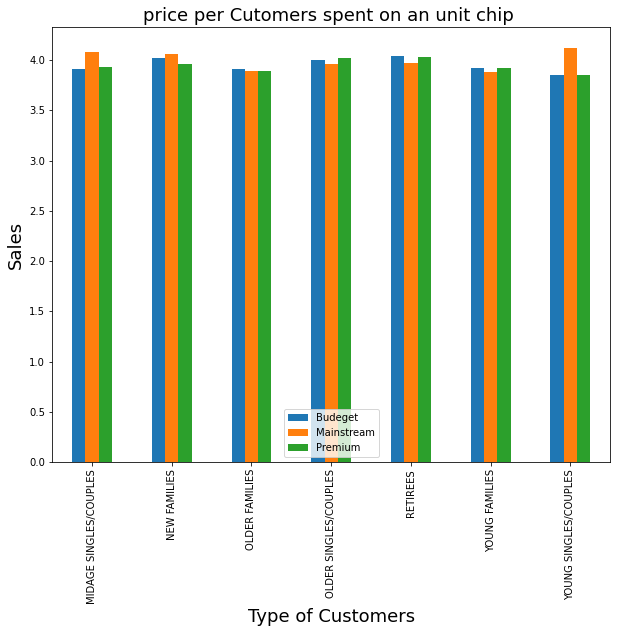

In [24]:
ax3 = sales_per_customers.plot.bar(figsize = (10,8))
ax3.legend(['Budeget','Mainstream','Premium'])
ax3.set_title('price per Cutomers spent on an unit chip ',fontsize = 18)
ax3.set_xlabel('Type of Customers',fontsize = 18)
ax3.set_ylabel('Sales',fontsize = 18)


Mainstream - midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.<br>
This may due to their premium counterpart are more willing to buy healthy grocery while budge counterparts prefer buying necessities.<br>

**Deep dive into specific customer segments for insights**<br>
Budget-older families,Mainstream -retirees and Mainstream - Young Singles/couples.

In [25]:
Budget_older_families = new_data.loc[(new_data['PREMIUM_CUSTOMER'] == 'Budget') & (new_data['LIFESTAGE'] == 'OLDER FAMILIES')]
print(Budget_older_families)

                       DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
2       2018-07-01 00:00:00       124         124236  127984      104   
29      2018-07-01 00:00:00        45          45071   40807       43   
44      2018-07-01 00:00:00       242         242226  246328       32   
47      2018-07-01 00:00:00       257         257190  256903       68   
58      2018-07-01 00:00:00       128         128220  132034       91   
...                     ...       ...            ...     ...      ...   
246632  2019-06-30 00:00:00       145         145116  145327       36   
246643  2019-06-30 00:00:00        81          81119   80281       89   
246685  2019-06-30 00:00:00       105         105065  105670        3   
246718  2019-06-30 00:00:00       208         208156  207010       46   
246735  2019-06-30 00:00:00        97          97085   96824       33   

                                       PROD_NAME PROD_QTY  TOT_SALES Size  \
2       Infuzions Thai SweetChili PotatoMix 11

In [26]:

Budget_older_families_count = Budget_older_families.groupby(['Brand'])['PROD_QTY'].sum().reset_index()
Budget_older_families_count = Budget_older_families_count.sort_values(by = ['PROD_QTY'], ascending=False)
Budget_older_families_count['PROD_QTY'] = (Budget_older_families_count['PROD_QTY']/Budget_older_families_count['PROD_QTY'].sum())*100

print(Budget_older_families_count)

         Brand   PROD_QTY
9       Kettle  23.729805
11    Pringles  14.127495
15       Thins   8.326632
8    Infuzions   6.444185
17    Twisties   5.822794
4         Cobs   5.442649
16    Tostitos   4.989400
10     Natural   4.101177
7        Grain   3.563857
12         Red   3.494407
18    Tyrrells   3.483442
1          CCs   3.223920
3     Cheezels   3.077710
13       Smith   2.178522
2      Cheetos   2.003070
5       Dorito   1.776446
0       Burger   1.100227
19  Woolworths   1.092916
14    Sunbites   1.012501
6       French   1.008846


We can see that the Budget-older families more likely to purchase Kettle and least likely to purchase Sunbites.

In [27]:
Budget_older_families_size = Budget_older_families.groupby(['Size'])['PROD_QTY'].sum().reset_index()
Budget_older_families_size = Budget_older_families_size.sort_values(by = ['PROD_QTY'], ascending=False)
Budget_older_families_size['PROD_QTY'] = (Budget_older_families_size['PROD_QTY']/Budget_older_families_size['PROD_QTY'].sum())*100

print(Budget_older_families_size)


    Size   PROD_QTY
8    175  32.641275
6    150  16.485123
4    134  14.127495
2    110  10.877988
7    165   4.368009
13   270   3.834345
10   210   3.563857
9    190   2.211419
12   250   1.988449
14   330   1.984794
5    135   1.926310
15   380   1.776446
11   220   1.100227
3    125   1.092916
1     90   1.012501
0     70   1.008846


We can see that the Budget-older families most likely to purchase 175g and least likely to purchase 70g.

In [28]:
Mainstream_retirees = new_data.loc[(new_data['PREMIUM_CUSTOMER'] == 'Mainstream') & (new_data['LIFESTAGE'] == 'RETIREES')]
print(Mainstream_retirees.head())


                   DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
8   2018-07-01 00:00:00        23          23124   19481      102   
14  2018-07-01 00:00:00       130         130189  134445       87   
25  2018-07-01 00:00:00        17          17379   15178       33   
31  2018-07-01 00:00:00       144         144001  143893       28   
32  2018-07-01 00:00:00        19          19102   16139       46   

                                   PROD_NAME PROD_QTY  TOT_SALES Size  \
8     Kettle Mozzarella   Basil & Pesto 175g        2       10.8  175   
14   Infuzions BBQ Rib   Prawn Crackers 110g        2        7.6  110   
25  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g        2        7.6  110   
31      Thins Potato Chips  Hot & Spicy 175g        2        6.6  175   
32                      Kettle Original 175g        2       10.8  175   

        Brand LIFESTAGE PREMIUM_CUSTOMER  
8      Kettle  RETIREES       Mainstream  
14  Infuzions  RETIREES       Mainstream  
25       Cobs  RE

In [29]:
Mainstream_retirees_count = Mainstream_retirees.groupby(['Brand'])['PROD_QTY'].sum().reset_index()
Mainstream_retirees_count = Mainstream_retirees_count.sort_values(by = ['PROD_QTY'], ascending=False)
Mainstream_retirees_count['PROD_QTY'] = (Mainstream_retirees_count['PROD_QTY']/Mainstream_retirees_count['PROD_QTY'].sum())*100

print(Mainstream_retirees_count)

         Brand   PROD_QTY
9       Kettle  24.764033
11    Pringles  15.390839
15       Thins   8.779905
8    Infuzions   6.657164
17    Twisties   5.840428
4         Cobs   5.732558
16    Tostitos   5.439766
7        Grain   3.964249
18    Tyrrells   3.733097
10     Natural   3.382517
3     Cheezels   2.773818
12         Red   2.573487
1          CCs   2.569634
5       Dorito   1.829950
13       Smith   1.752899
2      Cheetos   1.698964
0       Burger   0.878376
14    Sunbites   0.801325
19  Woolworths   0.755095
6       French   0.681897


We can see that the Mainstrean-retirees more likely to purchase Kettle and least likely to purchase French.

In [30]:

Mainstream_retirees_size = Mainstream_retirees.groupby(['Size'])['PROD_QTY'].sum().reset_index()
Mainstream_retirees_size = Mainstream_retirees_size.sort_values(by = ['PROD_QTY'], ascending=False)
Mainstream_retirees_size['PROD_QTY'] = (Mainstream_retirees_size['PROD_QTY']/Mainstream_retirees_size['PROD_QTY'].sum())*100

print(Mainstream_retirees_size)

    Size   PROD_QTY
8    175  31.848827
6    150  16.172901
4    134  15.390839
2    110  11.430443
7    165   4.638440
10   210   3.964249
13   270   3.729245
12   250   2.111184
5    135   1.922410
14   330   1.907000
15   380   1.829950
9    190   1.548715
0     70   0.959279
11   220   0.878376
3    125   0.866818
1     90   0.801325


We can see that the Mainstrean-retirees most likely to purchase 175g and least likely to purchase 90g.


In [31]:

Mainstream_Young_Singles_couples = new_data.loc[(new_data['PREMIUM_CUSTOMER'] == 'Mainstream') & (new_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]
print(Mainstream_retirees.head())

                   DATE STORE_NBR LYLTY_CARD_NBR  TXN_ID PROD_NBR  \
8   2018-07-01 00:00:00        23          23124   19481      102   
14  2018-07-01 00:00:00       130         130189  134445       87   
25  2018-07-01 00:00:00        17          17379   15178       33   
31  2018-07-01 00:00:00       144         144001  143893       28   
32  2018-07-01 00:00:00        19          19102   16139       46   

                                   PROD_NAME PROD_QTY  TOT_SALES Size  \
8     Kettle Mozzarella   Basil & Pesto 175g        2       10.8  175   
14   Infuzions BBQ Rib   Prawn Crackers 110g        2        7.6  110   
25  Cobs Popd Swt/Chlli &Sr/Cream Chips 110g        2        7.6  110   
31      Thins Potato Chips  Hot & Spicy 175g        2        6.6  175   
32                      Kettle Original 175g        2       10.8  175   

        Brand LIFESTAGE PREMIUM_CUSTOMER  
8      Kettle  RETIREES       Mainstream  
14  Infuzions  RETIREES       Mainstream  
25       Cobs  RE

In [32]:

Mainstream_Young_Singles_couples_count = Mainstream_Young_Singles_couples.groupby(['Brand'])['PROD_QTY'].sum().reset_index()
Mainstream_Young_Singles_couples_count = Mainstream_Young_Singles_couples_count.sort_values(by = ['PROD_QTY'], ascending=False)
Mainstream_Young_Singles_couples_count['PROD_QTY'] = (Mainstream_Young_Singles_couples_count['PROD_QTY']/Mainstream_Young_Singles_couples_count['PROD_QTY'].sum())*100

print(Mainstream_Young_Singles_couples_count)


         Brand   PROD_QTY
9       Kettle  27.336484
11    Pringles  16.488794
15       Thins   8.335874
8    Infuzions   6.868425
17    Twisties   6.376734
16    Tostitos   6.270011
4         Cobs   6.163287
18    Tyrrells   4.356609
7        Grain   4.021192
3     Cheezels   2.481323
10     Natural   2.203080
5       Dorito   2.168776
12         Red   1.627535
1          CCs   1.543680
2      Cheetos   1.109163
13       Smith   0.910962
6       French   0.545053
0       Burger   0.404025
14    Sunbites   0.396402
19  Woolworths   0.392590


We can see that the Mainstream-Young Singles couples are more likely to purchase Kettle and least likely to purchase Woolworths.


In [33]:
Mainstream_Young_Singles_couples_size = Mainstream_Young_Singles_couples.groupby(['Size'])['PROD_QTY'].sum().reset_index()
Mainstream_Young_Singles_couples_size = Mainstream_Young_Singles_couples_size.sort_values(by = ['PROD_QTY'], ascending=False)
Mainstream_Young_Singles_couples_size['PROD_QTY'] = (Mainstream_Young_Singles_couples_size['PROD_QTY']/Mainstream_Young_Singles_couples_size['PROD_QTY'].sum())*100

print(Mainstream_Young_Singles_couples_size)


    Size   PROD_QTY
8    175  31.506327
4    134  16.488794
6    150  15.227169
2    110  12.612441
7    165   4.825431
13   270   4.394725
10   210   4.021192
15   380   2.168776
14   330   2.065864
5    135   2.039183
12   250   1.982009
9    190   1.032932
0     70   0.419271
3    125   0.415460
11   220   0.404025
1     90   0.396402


We can see that 27% of the Mainstream_Young_Singles_couples more likely to purchase 175g and least likely to purchase 125g.

## Conclusion
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
-retirees shoppers.
We found that the high spend in chips for mainstream young singles/couples and retirees is due to the great number of customer in these segments.
Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. 
This is indicating their buying behaviour.
We have also discovered that kettle is the most popular chips brand over these segements and 175g is the most often size that customer would buy so we can have more promotion on kettle and 175g chips.
